# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [29]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
import csv

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [30]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


623

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [39]:
# Setting the base url for queries to build off of
url = "http://api.openweathermap.org/data/2.5/weather?"

# using the imported csv writer to generate a csv file
with open ('city_data.csv', 'w', newline = '') as f:
    writer = csv.writer(f)
    
    # Setting the column headers for the csv file
    writer.writerow(['City', 'Cloudiness', 'Country', 'Date', 'Humidity', 'Lat', 'Lon', 'Max Temp', 'Wind Speed'])
    
    # Starting the for loop to cycle through the cities variable and pull data
    for city in cities:
        
        # Setting the try/except loop to keep the party rolling
        try:
            # Generating a query url for each city
            query_url = url + "q=" + city + '&units=imperial' + "&appid=" + weather_api_key
            
            # Getting the JSON response for each query
            city_response = requests.get(query_url).json()
            
            # Writing the relevant data to the csv file for each city
            writer.writerow([city, 
                             city_response['clouds']['all'], 
                             city_response['sys']['country'], 
                             city_response['dt'], 
                             city_response['main']['humidity'], 
                             city_response['coord']['lat'], 
                             city_response['coord']['lon'], 
                             city_response['main']['temp_max'], 
                             city_response['wind']['speed']])
            
            # Printing each record as it's processed
            print('Processing record # ' + str(cities.index(city)) + ' - ' + city)
        
        # Setting the exception message and making sure it passes so it continues on
        except KeyError:
            print('Missing Data. Skipping record # ' + str(cities.index(city)) + ' - ' + city)
            pass    

Processing record # 0 - hilo
Processing record # 1 - aykhal
Processing record # 2 - butaritari
Missing Data. Skipping record # 3 - sentyabrskiy
Processing record # 4 - cidreira
Processing record # 5 - cockburn town
Processing record # 6 - kemptville
Processing record # 7 - kodiak
Processing record # 8 - calama
Processing record # 9 - ushuaia
Processing record # 10 - saint-joseph
Processing record # 11 - gizo
Processing record # 12 - mahebourg
Processing record # 13 - cherskiy
Processing record # 14 - varna
Processing record # 15 - thompson
Processing record # 16 - flinders
Missing Data. Skipping record # 17 - uwayl
Missing Data. Skipping record # 18 - marcona
Processing record # 19 - agde
Processing record # 20 - basar
Processing record # 21 - yellowknife
Processing record # 22 - qaanaaq
Processing record # 23 - fairbanks
Processing record # 24 - port alfred
Processing record # 25 - xuchang
Processing record # 26 - bluff
Processing record # 27 - pangai
Processing record # 28 - upernavi

Processing record # 231 - launceston
Processing record # 232 - souillac
Processing record # 233 - baykit
Missing Data. Skipping record # 234 - sumbawa
Processing record # 235 - fortuna
Processing record # 236 - broken hill
Processing record # 237 - naliya
Processing record # 238 - aripuana
Processing record # 239 - nizhniy tsasuchey
Processing record # 240 - pompeu
Processing record # 241 - oktyabrskoye
Processing record # 242 - japura
Processing record # 243 - kaitangata
Processing record # 244 - port macquarie
Processing record # 245 - comodoro rivadavia
Processing record # 246 - salisbury
Processing record # 247 - limanowa
Processing record # 248 - jamui
Processing record # 249 - rindal
Processing record # 250 - koszalin
Processing record # 251 - kruisfontein
Processing record # 252 - borisoglebsk
Processing record # 253 - shimsk
Processing record # 254 - bethel
Processing record # 255 - richards bay
Processing record # 256 - avera
Processing record # 257 - luanda
Processing record 

Processing record # 458 - kingston
Processing record # 459 - padang
Processing record # 460 - waipawa
Processing record # 461 - najran
Processing record # 462 - praia
Processing record # 463 - doba
Processing record # 464 - taoudenni
Processing record # 465 - eyl
Processing record # 466 - nelson bay
Processing record # 467 - butajira
Processing record # 468 - russell
Processing record # 469 - canico
Processing record # 470 - katsuura
Processing record # 471 - alekseyevka
Missing Data. Skipping record # 472 - meyungs
Processing record # 473 - honiara
Processing record # 474 - zhigansk
Processing record # 475 - mogocha
Processing record # 476 - dokri
Processing record # 477 - vestmanna
Processing record # 478 - chilca
Processing record # 479 - mahanje
Processing record # 480 - gimli
Processing record # 481 - kutum
Processing record # 482 - terrace
Processing record # 483 - agirish
Processing record # 484 - peniche
Processing record # 485 - kuito
Processing record # 486 - finschhafen
Proc

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [62]:
# Pulling the city_data.csv and converting to a dataframe through pandas
weather_data = 'city_data.csv'
weather_df = pd.read_csv(weather_data)

City          579
Cloudiness    579
Country       573
Date          579
Humidity      579
Lat           579
Lon           579
Max Temp      579
Wind Speed    579
dtype: int64

In [41]:
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lon,Max Temp,Wind Speed
0,hilo,1,US,1580178285,54,19.73,-155.09,80.60,13.87
1,aykhal,0,RU,1580178285,69,66.00,111.50,-11.20,4.47
2,butaritari,95,KI,1580178285,78,3.07,172.79,84.47,23.11
3,cidreira,77,BR,1580178286,77,-30.18,-50.21,74.30,12.68
4,cockburn town,25,TC,1580178286,76,21.46,-71.14,76.39,10.16


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

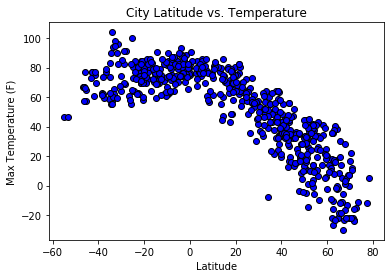

In [81]:
# Plotting the Latitude vs. Temperature scatter plot

plt.scatter(x = weather_df['Lat'], y = weather_df['Max Temp'], facecolor = 'blue', edgecolor = 'black')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('City Latitude vs. Temperature')
plt.savefig('lat_temp.png')
plt.show()

The code is comparing latitude to max temperature (F) to see if there is any correlation between the two.

#### Latitude vs. Humidity Plot

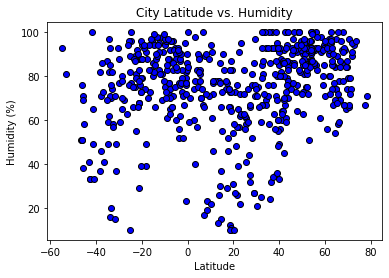

In [82]:
# Plotting the Latitude vs. Humidity scatter plot
plt.scatter(x = weather_df['Lat'], y = weather_df['Humidity'], facecolor = 'blue', edgecolor = 'black')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs. Humidity')
plt.savefig('lat_humid.png')
plt.show()

The code is comparing latitude to humidity % to see if there is any correlation between the two.

#### Latitude vs. Cloudiness Plot

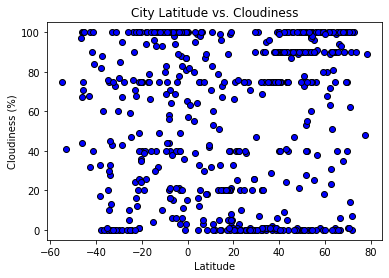

In [83]:
# Plotting the Latitude vs. Cloudiness scatter plot
plt.scatter(x = weather_df['Lat'], y = weather_df['Cloudiness'], facecolor = 'blue', edgecolor = 'black')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs. Cloudiness')
plt.savefig('lat_cloud.png')
plt.show()

The code is comparing latitude to cloudiness (%) to see if there is any correlation between the two.

#### Latitude vs. Wind Speed Plot

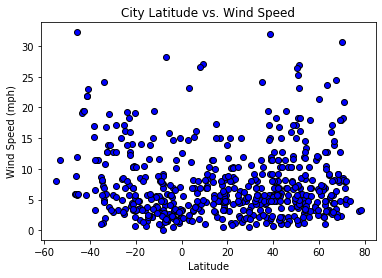

In [84]:
# Plotting the Latitude vs. Wind Speed scatter plot
plt.scatter(x = weather_df['Lat'], y = weather_df['Wind Speed'], facecolor = 'blue', edgecolor = 'black')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('City Latitude vs. Wind Speed')
plt.savefig('lat_wind.png')
plt.show()

The code is comparing latitude to max wind speed (mph) to see if there is any correlation between the two.

## Linear Regression

In [87]:
# OPTIONAL: Create a function to create Linear Regression plots
''' This is the template I used, with some modifications
x = northern_df['Lat']
y = northern_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.show()
'''

In [88]:
# Create Northern and Southern Hemisphere DataFrames
northern_df = weather_df[weather_df['Lat'] > 0]

southern_df = weather_df[weather_df['Lat'] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8759434667960792


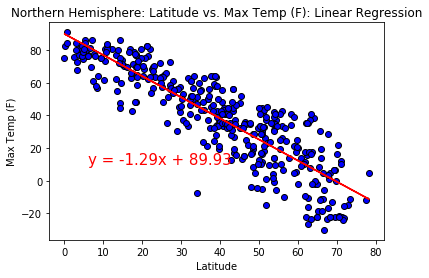

In [94]:
# Plotting the Northern Hemisphere - Max Temp vs. Latitude Linear Regression and printing the r-squared value
x = northern_df['Lat']
y = northern_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
print('The r-squared is: ' + str(rvalue))
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x, y, facecolors = 'blue', edgecolors = 'black')
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.title('Northern Hemisphere: Latitude vs. Max Temp (F): Linear Regression')
plt.savefig('north_lat_temp.png')
plt.show()

In this instance, it appears that the temperature decreases as latitude increases (or: the further north one goes, the colder it gets)

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.35164230704820193


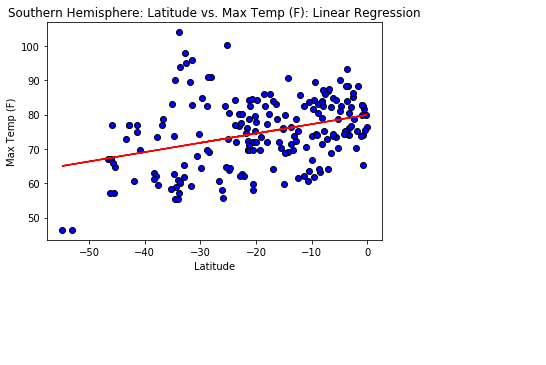

In [95]:
# Plotting the Southern Hemisphere - Max Temp vs. Latitude Linear Regression and printing the r-squared value
x = southern_df['Lat']
y = southern_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
print('The r-squared is: ' + str(rvalue))
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x, y, facecolors = 'blue', edgecolors = 'black')
plt.plot(x, regress_values, "r-")
plt.annotate(line_eq, (6,10), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.title('Southern Hemisphere: Latitude vs. Max Temp (F): Linear Regression')
plt.savefig('south_lat_temp.png')
plt.show()

In this instance, it appears that the temperature increases as latitude increases (or: the further north one goes, the warmer it gets) - however, this is not as pronounced a shift as it is for the temperatures in the north.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.3865070130253928


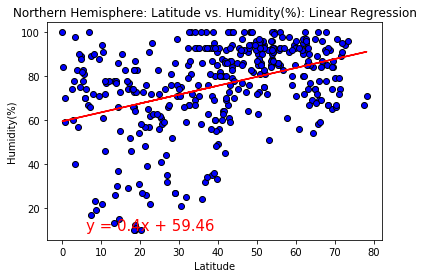

In [96]:
# Plotting the Northern Hemisphere - Humidity(%) vs. Latitude Linear Regression and printing the r-squared value
x = northern_df['Lat']
y = northern_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
print('The r-squared is: ' + str(rvalue))
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x, y, facecolors = 'blue', edgecolors = 'black')
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq, (6,10), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
plt.title('Northern Hemisphere: Latitude vs. Humidity(%): Linear Regression')
plt.savefig('north_lat_humid.png')
plt.show()

It appears that there is a relationship between latitude and humidity, with increased humidity as one continues north.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.34595600660851633


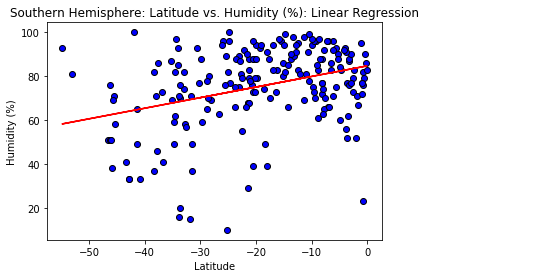

In [97]:
# Plotting the Southern Hemisphere - Humidity(%) vs. Latitude Linear Regression and printing the r-squared value
x = southern_df['Lat']
y = southern_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
print('The r-squared is: ' + str(rvalue))
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x, y, facecolors = 'blue', edgecolors = 'black')
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(6,10), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Southern Hemisphere: Latitude vs. Humidity (%): Linear Regression')
plt.savefig('south_lat_humid.png')
plt.show()

Interestingly, it also appears that humidity increases as one continues north from the southern hemisphere.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.29972836499252375


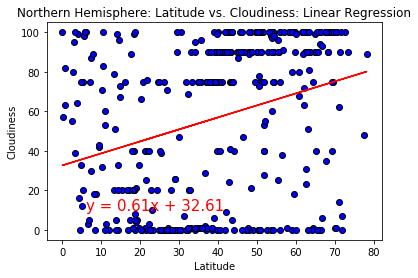

In [98]:
# Plotting the Northern Hemisphere - Cloudiness(%) vs. Latitude Linear Regression and printing the r-squared value
x = northern_df['Lat']
y = northern_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
print('The r-squared is: ' + str(rvalue))
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x, y, facecolors = 'blue', edgecolors = 'black')
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq, (6,10), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Northern Hemisphere: Latitude vs. Cloudiness: Linear Regression')
plt.savefig('north_lat_cloud.png')
plt.show()

Cloudiness doesn't seem to have a particular relationship to latitude here, although it is interesting to see the bands of cloudiness at 0%, 75% (or thereabouts), 90% (or thereabouts) and 100%.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.12439462283066127


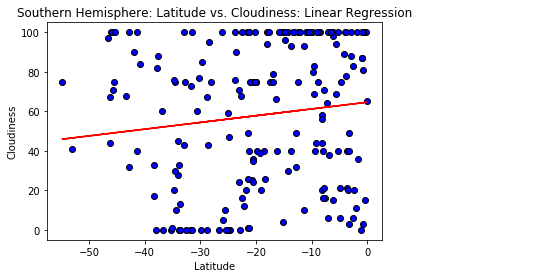

In [99]:
# Plotting the Southern Hemisphere - Cloudiness(%) vs. Latitude Linear Regression and printing the r-squared value
x = southern_df['Lat']
y = southern_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
print('The r-squared is: ' + str(rvalue))
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x, y, facecolors = 'blue', edgecolors = 'black')
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq, (6,10), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Southern Hemisphere: Latitude vs. Cloudiness: Linear Regression')
plt.savefig('south_lat_cloud.png')
plt.show()

Similarly, there doesn't appear to be much of a defined connection between latitude and cloudiness in the southern hemisphere, either.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.08516789074861071


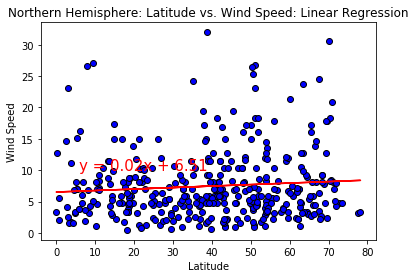

In [100]:
# Plotting the Northern Hemisphere - Wind Speed vs. Latitude Linear Regression and printing the r-squared value
x = northern_df['Lat']
y = northern_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
print('The r-squared is: ' + str(rvalue))
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x, y, facecolors = 'blue', edgecolors = 'black')
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq, (6,10), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Northern Hemisphere: Latitude vs. Wind Speed: Linear Regression')
plt.savefig('north_lat_wind.png')
plt.show()

Wind speeds are relatively low across the board, though they appear to increase slightly as one proceeds north.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.4130810867648115


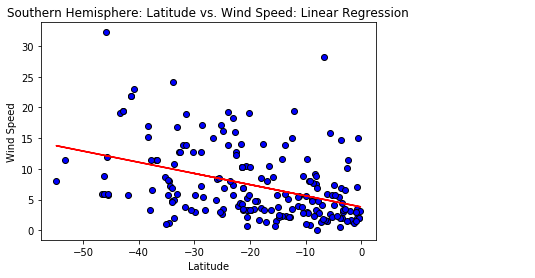

In [101]:
# Plotting the Southern Hemisphere - Wind Speed vs. Latitude Linear Regression and printing the r-squared value
x = southern_df['Lat']
y = southern_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
print('The r-squared is: ' + str(rvalue))
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x, y, facecolors = 'blue', edgecolors = 'black')
plt.plot(x, regress_values,"r-")
plt.annotate(line_eq, (6,10), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Southern Hemisphere: Latitude vs. Wind Speed: Linear Regression')
plt.savefig('south_lat_wind.png')
plt.show()

Wind speeds in the southern hemisphere start comparatively high and decrease as one approaches the equator.